# <center> FUNDAMENTOS DE APRENDIZAJE AUTOMÁTICO <br> Y RECONOCIMIENTO DE PATRONES</center>
## <center> 1er parcial, 2021</center>           
### <center>5 de octubre de 2021</center>

La duración del parcial es de 3 horas. El parcial consta de 2 ejercicios, cuya suma total es de 100 puntos. El parcial es sin material y no está permitido acceder a Internet. Lea con atención y ante cualquier duda comuníquese con los docentes. 

Este notebook corresponde al **ejercicio 1**. Hay un notebook por ejercicio planteado.

* [Ejercicio 1 - Clasificación binaria](#Ejercicio1) (60 puntos)

# Importar bibliotecas

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from fuaa_utils_ej1 import visualizar_conjunto_entrenamiento
from fuaa_utils_ej1 import visualizar_modelo_lineal
from fuaa_utils_ej1 import visualizar_costo_entrenamiento
from fuaa_utils_ej1 import visualizar_frontera_decision
from fuaa_utils_ej1 import generar_semianillos
from fuaa_utils_ej1 import validar_resultado
from fuaa_utils_ej1 import identificar_parcial
import time

%matplotlib inline

identificar_parcial()

# Ejercicio 1
<a id="Ejercicio1"></a>

Este es un problema de clasificación binaria. Se usarán datos sintéticos, inicialmente un conjunto linealmente separable y luego un conjunto no linealmente separable. Se implementarán varios enfoques para la solución del problema.

## Generación de datos sintéticos linealmente separables

En esta parte se trabajarán con datos linealmente separables. Se consideran las dos clases con estructura de semianillo generadas por la función `generar_semianillos()`. Ejecutar la siguientes celdas y generar 2000 muestras uniformemente distribuídas, aproximadamente 1000 de cada clase.

La función `generar_semianillos()` tiene la siguiente definición:

<pre>
generar_semianillos(N, radio1, radio2, ancho1, ancho2, delta_x, delta_y):
    Entrada:
        N: número de muestras a generar.
        radio1: radio interior del semicírculo asociado a la clase 1.
        radio2: radio interior del semicírculo asociado a la clase 2.
        ancho1: diferencia entre el radio exterior e interior del semicírculo asociado a la clase 1.
        ancho2: diferencia entre el radio exterior e interior del semicírculo asociado a la clase 2.
        delta_x: corrimiento en x respecto al origen del semicirculo asociado a la clase 2.
        delta_y: corrimiento en y respecto al origen del semicirculo asociado a la clase 2.
    Salida:
        X: matriz de Nx3 que contiene los datos generados en coordenadas homogéneas.
        y: etiquetas asociadas a los datos.
</pre>

In [2]:
N = 2000
r1 = 20; w1 = 5; r2 = 15; w2 = -5; off_x = -12.5; off_y = 5
X, y = generar_semianillos(N, r1, r2, w1, w2, off_x, off_y)
visualizar_conjunto_entrenamiento(X, y)

## El perceptrón para separar clases linealmente separables

### Parte a) 

Implemenar la función `error_binario()` que calcula el error de clasificación binario entre las predicciones y las etiquetas de los datos.

In [3]:
def error_binario(y, y_pred):
    '''
    Calcula el error de clasificación entre las etiquetas reales y las estimadas.
    Entrada:
        y: arreglo de las N etiquetas del conjunto de datos.
        y_pred: arreglo de las N predicciones de las etiquetas.
        
    Salida:
        err_bin: error de clasificación binaria para el conjunto de datos.
    '''

    #####################################################
    ####### EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO #######
    #####################################################

    err_bin = np.average(y!=y_pred)

    #####################################################
    ####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    return err_bin

In [4]:
# Validación de error_binario()
validar_resultado("error_binario", funcion=error_binario)

### Parte b) 

Implemenar el algoritmo `entrenar_perceptron()` y utilizarlo para separar los semianillos linealmente separables. Se recuerda que el perceptrón es un algoritmo iterativo que en caso de actualizar los pesos, lo hace mediante la siguiente regla: $\mathbf{w}(t+1)=\mathbf{w}(t)+y(t)\mathbf{x}(t)$


In [5]:
def entrenar_perceptron(X, y, w_inicial=None, max_iter = 500000):
    """
    Entrada:
        X: arreglo de tamaño (N, d+1) que contiene las muestras de entrenamiento.
        y: arreglo de tamaño (N,) con las etiquetas asociadas a las muestras de entrenamiento.
        max_iter: máxima cantidad de iteraciones que el algoritmo puede estar iterando.
        w_inicial: inicialización de los pesos del perceptrón.
        
    Salida:
        w: parámetros del modelos perceptrón.
        costo: lista que contiene el porcentaje de muestras mal clasificadas en cada iteración.
    """
    
    if w_inicial is None:
        # Se inicializan los pesos del perceptrón
        w = np.random.rand(X.shape[1])
    else:
        w = w_inicial

    costo = []
    
    #######################################################
    ######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
    #######################################################
    
    i = 0
    hay_mal_clasificados = True
    
    while (i < max_iter) and hay_mal_clasificados:
        
        y_pred = np.sign(X @ w)
        
        indices_mal_clasificados = y != y_pred
        
        costo_i = np.average(indices_mal_clasificados) # tambien se puede llamar error_binario()
        
        costo.append(costo_i)
        
        hay_mal_clasificados = costo_i>0
        
        if hay_mal_clasificados:
            indice = np.random.randint(0, np.count_nonzero(indices_mal_clasificados))
            w = w + (y[indices_mal_clasificados])[indice]*(X[indices_mal_clasificados])[indice]
        
        i += 1
    #######################################################
    ######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
    #######################################################
    
    return w, costo

In [6]:
#######################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################

# inicializar el vector de pesos con ceros
w_inicial = np.zeros(X.shape[1]) 

w_perceptron, costo_perceptron = entrenar_perceptron(X, y, w_inicial=w_inicial)


y_pred = np.sign(X @ w_perceptron)


# calcular el error de clasificación binaria
error_perceptron = error_binario(y, y_pred)


#######################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################

print('El perceptrón finalizó en la iteración %d' % len(costo_perceptron))
print('El error de clasificación en el conjunto de entrenamiento es %f' % error_perceptron)

# Se grafica el resultado del entrenamiento
visualizar_modelo_lineal(X,y,w_perceptron)
visualizar_costo_entrenamiento(costo_perceptron)

### Parte c) 

Explique de qué forma puede saber si llegó a una solución correcta con el algoritmo del perceptrón para este conjunto de datos. 

**Respuesta:** 

Si el error binario cuando termina la ejecución es 0, eso quiere decir que hallo una solución que separa linealmente al conjunto de entrenamiento.

## Un nuevo perceptrón

Se considera la función de costo 

$$
E_{in}(\mathbf{w})=\max_\mathbf{w}(0, 1-y_n \mathbf{w}^T\mathbf{x}_n)\tag{1}
$$

### Parte d)

 Calcular $\nabla E_{in}(\mathbf{w})$. Argumente que $E_{in}(\mathbf{w})$ es continua y diferenciable excepto cuando $y_n=\mathbf{w}^T\mathbf{x}_n$.

**Respuesta:** 

Tenemos dos casos posibles:

1. Si $1-y_n \textbf{w}^T \textbf{x}_n > 0 \Rightarrow E_{in}(\textbf{w}) = y_n \textbf{w}^T \textbf{x}_n$

2. Si $1-y_n \textbf{w}^T \textbf{x}_n < 0 \Rightarrow E_{in}(\textbf{w}) = 0$

*Caso 1*:

$$
\nabla E_{in}(\textbf{w}) = \nabla (1-y_n \textbf{w}^T \textbf{x}_n) = -y_n\nabla (\textbf{w}^T \textbf{x}_n) = -y_n \textbf{x}_n  \quad\quad si \quad 1-y_n \textbf{w}^T \textbf{x}_n > 0
$$

*Caso 2*:

$$
\nabla E_{in}(\textbf{w}) = \nabla (0) = 0 \quad\quad si \quad 1-y_n \textbf{w}^T \textbf{x}_n < 0
$$

Por lo tanto, 
$$
\nabla E_{in}(\textbf{w}) = \begin{cases}
                            -y_n \textbf{x}_n & si \quad 1-y_n \textbf{w}^T \textbf{x}_n > 0 \\
                            0  & si \quad 1-y_n \textbf{w}^T \textbf{x}_n < 0 
                            \end{cases}
$$

Notar que $\nabla E_{in}(\textbf{w})$ es continua excepto cuando $y_n = \textbf{w}^T \textbf{x}_n$, por lo que $E_{in}$ es continua y diferenciable en todos los puntos excepto en $y_n = \textbf{w}^T \textbf{x}_n$

Obs: $y_n = \frac{1}{y_n} \Rightarrow 1-y_n \textbf{w}^T \textbf{x}_n = 0 \quad sii \quad \textbf{w}^T \textbf{x}_n = \frac{1}{y_n} = y_n $

### Parte e)

Implementar el algoritmo `nuevo_perceptron()`. Para ello optimizar la función de costo $\frac{1}{N} \sum_{n=1}^{N} E_{in}(\mathbf{w})$ mediante descenso por gradiente estocástico.

In [34]:
def nuevo_perceptron(X, y, lr=0.1, num_epocas=250, w_inicial=None):
    '''
    Entrada:
        X: arreglo de (N,d+1) con N muestras de entrenamiento de dimensión d expresadas en 
           coordenadas homogéneas.
        y: arreglo de dimensión N con las etiquetas asociadas a N muestras.
        lr: tasa de aprendizaje.
        num_epocas: máximo número de épocas a optimizar. Si el costo es cero se termina antes.
        w_inicial: vector de pesos inicial. Si vale None se inicializa con valores aleatorios.
    Salida:
        w: arreglo de tamaño (d+1) con los pesos óptimos encontrados.
        costo: lista con el costo de la optimización en cada época.
    '''
    N = X.shape[0]
    d = X.shape[1]-1
    if w_inicial is None:
        w = np.random.randn(d+1)
    else:
        w = w_inicial
        
    costo = []
    
    #######################################################
    ######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
    #######################################################
    epoca = 0
    hay_muestras_mal_clasificadas = True
    while (epoca<num_epocas) and hay_muestras_mal_clasificadas:
        
        indices = np.random.permutation(N)
        
        for i in indices:
            if (1 - y[i]*(X[i]@w)) > 0:
                grad_i = -y[i] * X[i]
            else:
                grad_i = 0
            
            w = w - lr*grad_i
                
        costo_epoca = 0
        for i in range(N):
            if (1 - y[i]*(X[i]@w)) > 0:
                costo_epoca += (1 - y[i]*(X[i]@w))
            else:
                costo_epoca += 0
        
        costo_epoca /= N
        costo.append(costo_epoca)
        epoca += 1
        hay_muestras_mal_clasificadas = costo_epoca > 0 # si todos los errores son 0 se llego a la solución
        
    #######################################################
    ######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
    #######################################################
    
    return w, costo

Utilizar el método `nuevo_perceptron()` implementado anteriormente para separar los datos linealmente separables.

El nuevo perceptrón finalizó en la época 15
El error de clasificación en el conjunto de entrenamiento es 0.000000


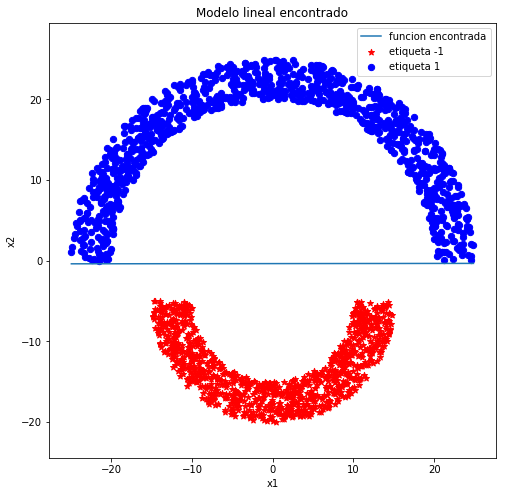

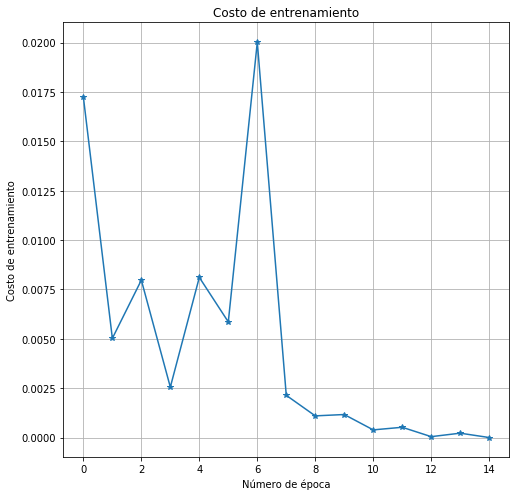

In [20]:
#######################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################

# inicializar el vector de pesos con ceros
w_inicial = np.zeros(X.shape[0])

w_new_perc, costo_new_perc = nuevo_perceptron(X,y, lr=0.01)

y_pred = np.sign(X@w_new_perc)

# calcular el error de clasificación binaria
error_new_perc = error_binario(y, y_pred)

#######################################################
######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################

print('El nuevo perceptrón finalizó en la época %d' % len(costo_new_perc))
print('El error de clasificación en el conjunto de entrenamiento es %f' % error_new_perc)

# Se grafica el resultado del entrenamiento utilizando regresión lineal.
visualizar_modelo_lineal(X,y,w_new_perc)
visualizar_costo_entrenamiento(costo_new_perc, xlabel='Número de época')

### Parte f) 

**Pregunta:** ¿Cuál es el parámetro del algoritmo del nuevo perceptrón que determina la cantidad de épocas que se requieren para alcazar la solución? Indique la cantidad de épocas para al menos tres valores de dicho parámetro. 




**Respuesta:** 

El learning rate($lr$) determina la velocidad de convergencia del descenso por gradiente. 
Probando distintos valores de $lr$ se obtiene:

| lr | épocas |
|------|--------|
| 0.001 | ~100 |
| 0.01 | ~10 |
| 0.1 | ~4 |
| 1 | ~2 |


Los valores son aproximados porque según la randomización pueden converger más o menos rápidos. Correr el bloque debajo varias veces y observar los distintos resultados.

In [21]:
w_new_perc, costo_new_perc = nuevo_perceptron(X,y, lr=0.001)
print('lr=0.001    Épocas: %d' % len(costo_new_perc))

w_new_perc, costo_new_perc = nuevo_perceptron(X,y, lr=0.01)
print('lr=0.01    Épocas: %d' % len(costo_new_perc))

w_new_perc, costo_new_perc = nuevo_perceptron(X,y, lr=0.1)
print('lr=0.1    Épocas: %d' % len(costo_new_perc))

w_new_perc, costo_new_perc = nuevo_perceptron(X,y, lr=1)
print('lr=1    Épocas: %d' % len(costo_new_perc))

lr=0.001    Épocas: 73
lr=0.01    Épocas: 15
lr=0.1    Épocas: 3
lr=1    Épocas: 2


## Datos no linealmente separables

El siguiente bloque genera un conjunto de datos no linealmente separables y los muestra. De aquí en adelante se trabajará con estos datos. 

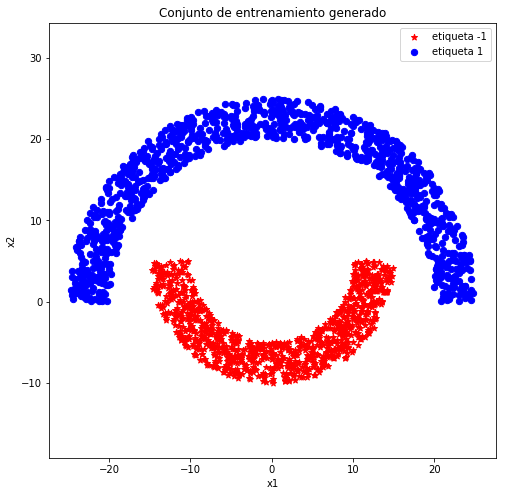

In [22]:
N = 2000
r1 = 20; w1 = 5; r2 = 15; w2 = -5; off_x = -12.5; off_y = -5
X_no_lin, y_no_lin = generar_semianillos(N, r1, r2, w1,w2, off_x, off_y)

visualizar_conjunto_entrenamiento(X_no_lin, y_no_lin)

## Partición en entrenamiento y validación

### Parte g) 


Complete la función `particionar_datos()` que divide aleatoriamente el conjunto de datos disponible en dos conjuntos: entrenamiento y validación. Divida de esa forma los datos generados anteriormente usando las proporciones por defecto. 

In [23]:
def particionar_datos(X, y, valid_size=0.2):
    '''
    Divide aleatoriamente el conjunto de datos disponible en dos conjuntos: entrenamiento y validación.

    Entrada:
        X: matriz de datos en coordenadas homogéneas.
        y: etiquetas asociadas a los datos.
    Salida:
        Xtrain: matriz de datos de entrenamiento.
        ytrain: etiquetas de datos de entrenamiento.
        Xvalid: matriz de datos de validacion.
        yvalid: etiquetas de datos de validacion.
    '''

    # cantidad total de datos
    N = X.shape[0]
    # cantidad de datos de validacion
    Nvalid = int(N * valid_size)
    # cantidad de datos de entrenamiento
    Ntrain = N - Nvalid
    
    ######################################################
    ####### EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO  #######
    ######################################################
  
    indices = np.random.permutation(N)
    
    Xvalid = X[indices[:Nvalid]]
    yvalid = y[indices[:Nvalid]]
    
    Xtrain = X[indices[Nvalid:]]
    ytrain = y[indices[Nvalid:]]
    
    ######################################################
    ####### TERMINA ESPACIO PARA COMPLETAR CÓDIGO  #######
    ######################################################
    
    return Xtrain, ytrain, Xvalid, yvalid

Dividir con la función `particionar_datos()` los datos generados anteriormente usando las proporciones por defecto. 

In [24]:
np.random.seed(42)
valid_size = 0.2

# Se divide el conjunto de datos disponible en dos conjuntos: entrenamiento y validación
Xtrain, ytrain, Xvalid, yvalid = particionar_datos(X_no_lin, y_no_lin, valid_size = valid_size)

# Validar partición.
validar_resultado("train_val_sets", X_no_lin, Xtrain, Xvalid, valid_size)

+-------------------------------------------------------------------------+
|               FuAA (1er. parcial 2021): validar resultado               |
+-------------------------------------------------------------------------+
 Resultado validado: particiones de tamaños correctos.
+-------------------------------------------------------------------------+


### Parte h) 

**Pregunta:** Explique para qué usaría el conjunto validación. ¿Cuál es el compromiso existente entre el tamaño del conjunto de entrenamiento y el de validación? Por ejemplo, comente que ocurre si se utiliza un `valid_size=0.01`. 




**Respuesta:** 

Si se elige un porcentaje muy grande de puntos para validación, el entrenamiento va a ser peor y hay menos chances que generalize (menos muestras)

Si se elige un porcentaje muy grande, el conjunto de validación no es representativo de los datos, por lo que se puede tomar decisiones erroneas si justo el dataset contenía los datos más atípicos.

Como rule of thumb se toma un 20% de las muestras para hacer la validación

### Parte i)

Utilizar el método `nuevo_perceptron()` para separar los datos no linealmente separables. Inicializar el vector de pesos con ceros y dejar el número de épocas en el valor por defecto.

El nuevo perceptrón demoró 3.815692 segundos
El nuevo perceptrón finalizó en la época 250
El error de clasificación en el conjunto de entrenamiento es 0.088125


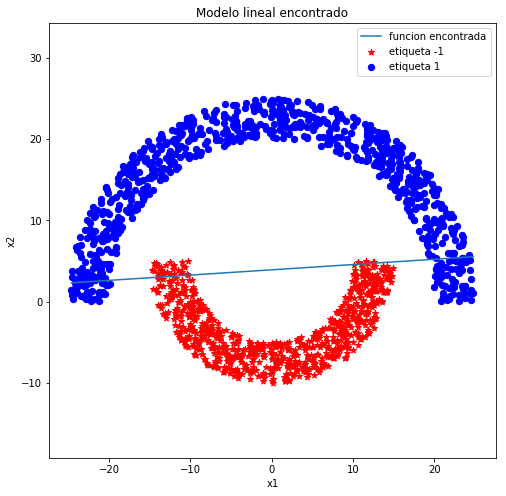

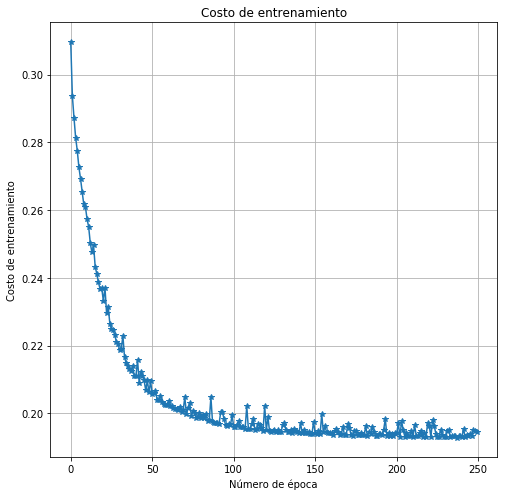

In [35]:
inicio = time.time()

#######################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################

# inicializar el vector de pesos con ceros
w_inicial = np.zeros(Xtrain.shape[1])
w_new_perc, costo_new_perc = nuevo_perceptron(Xtrain, ytrain, lr=0.0001, w_inicial=w_inicial)

y_pred = np.sign(Xtrain@w_new_perc)

# calcular el error de clasificación binaria
error_new_perc = error_binario(ytrain, y_pred)

#######################################################
######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################

fin = time.time()

print('El nuevo perceptrón demoró %f segundos' % (fin - inicio))
print('El nuevo perceptrón finalizó en la época %d' % len(costo_new_perc))
print('El error de clasificación en el conjunto de entrenamiento es %f' % error_new_perc)

# Se grafica el resultado del entrenamiento
visualizar_modelo_lineal(Xtrain,ytrain,w_new_perc)
visualizar_costo_entrenamiento(costo_new_perc, xlabel='Número de época')

### Parte j)

La evolución del error de entrenamiento para el *nuevo perceptrón* obtenida en la parte anterior al usar una *tasa de aprendizaje* de `lr=0.1` y de `lr=0.0001`, debería ser similar a la representada en las siguientes gráficas (izquierda para `lr=0.1` y derecha para `lr=0.0001`).


![Nuevo perceptrón no lin](imgs/nuevo_perceptron_no_lin.png)

**Pregunta:** Compare la evolución del error de entrenamiento y la solución encontrada por el *nuevo perceptrón* al usar una *tasa de aprendizaje* de `lr=0.1` y de `lr=0.0001`. Explique cualitativamente qué es lo que sucede. ¿La solución del perceptrón se asemeja más a un valor de `lr` alto o bajo? Justifique.

**Respuesta:**

Cuando el learning rate es muy grande, la función de costo tiene más de un mínimo local, por lo que un valor de lr alto puede llevar a pasar de un mínimo local a otro. Un lr chico lleva a una convergencia más lenta, pero asegura que siempre se haga sobre el mismo mínimo (que no tiene porque ser el menor, pero evita que suceda lo de la gráfica a la izquierda).

El perceptron equivale a un valor de $lr=1$. Observar que la regla de actualización equivale a sumar 0 si esta bien clasificado y $-lr y_n \textbf{x}_n$ si está mal clasificado, por lo que la regla de actualización tomando $lr=1$ es igual a la del perceptron.

## Transformación no lineal mediante polinomio de segundo orden
A continuación se van a transformar los datos no linealmente separables mediante una transformación con un polinomio de segundo orden de la forma 

$$\Phi_2(1,x_1,x_2)= (1, x_1, x_2, x_1^2, x_1x_2, x_2^2).\tag{2}$$

Luego se evaluará el desempeño del *nuevo perceptron* en el espacio transformado. La transformación se realizará utilizando el método `transformar_usando_polinomio()`. 


### Parte k)

Completar el método `transformar_usando_polinomio()`. 

In [48]:
def transformar_usando_polinomio(X):
    '''
    Entrada: 
        X: matriz de tamaño Nx3 que contiene las características originales en
           coordenadas homogéneas.
    Salida:
        Xt: matriz de tamaño Nx6 que contiene las características en el espacio 
            transformado
            \Phi_2(1,x1,x2) = (1, x1, x2, x1^2, x1x2, x2^2)
    '''
    
    #######################################################
    ######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
    #######################################################
    N = X.shape[0]
    d = 5
    
    Xt = np.zeros((N,d+1))
    
    Xt[:,0] = np.ones(N)
    Xt[:,1] = X[:,1]
    Xt[:,2] = X[:,2]
    Xt[:,3] = X[:,1]**2
    Xt[:,4] = X[:,1]*X[:,2]
    Xt[:,5] = X[:,2]**2
    
    #######################################################
    ######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
    #######################################################
    
    return Xt

In [37]:
# Validación de transformar_usando_polinomio()
validar_resultado("transformar_usando_polinomio", funcion=transformar_usando_polinomio)

+-------------------------------------------------------------------------+
|               FuAA (1er. parcial 2021): validar resultado               |
+-------------------------------------------------------------------------+
 Dimensión de salida: resultado validado.
 Transformación: resultado validado.
+-------------------------------------------------------------------------+


### Parte l)

Transformar los datos de entrenamiento usando la función `transformar_usando_polinomio()`. Encontrar una solución aplicando el algoritmo del *nuevo perceptrón* a los datos transformados. Es necesario ajustar el valor de la *tasa de aprendizaje* (`lr`) y el número de épocas (`num_epocas`).

In [46]:
inicio = time.time()
#######################################################
######## EMPIEZA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################

# transformar los datos de entrenamiento
Xt = transformar_usando_polinomio(Xtrain)

# inicializar el vector de pesos con ceros
w_inicial = np.zeros(Xt.shape[1])


# entrenar el nuevo perceptrón
wt, costo_new_perc_t = nuevo_perceptron(Xt, ytrain, lr=0.005, num_epocas=500, w_inicial=w_inicial)


y_pred = np.sign(Xt@wt)


# calcular el error de clasificación binaria
error_new_perc_t = error_binario(ytrain, y_pred)


#######################################################
######## TERMINA ESPACIO PARA COMPLETAR CODIGO ########
#######################################################
fin = time.time()

El perceptrón demoró 3.948130 segundos
El perceptrón finalizó en la iteración 274
El error de clasificación en el conjunto de entrenamiento es 0.000000


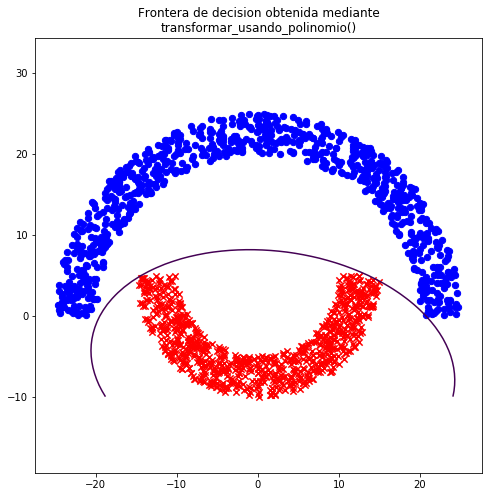

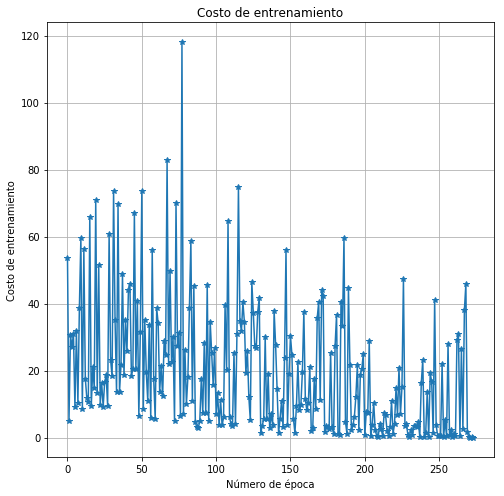

In [47]:
print('El perceptrón demoró %f segundos' % (fin - inicio))
print('El perceptrón finalizó en la iteración %d' % len(costo_new_perc_t))
print('El error de clasificación en el conjunto de entrenamiento es %f' % error_new_perc_t)

# Se grafica el resultado del entrenamiento
visualizar_frontera_decision(Xtrain, ytrain, wt, transformar_usando_polinomio)
visualizar_costo_entrenamiento(costo_new_perc_t, xlabel='Número de época')

### Parte m)

**Pregunta:** ¿Son linealmentes separables los datos en el espacio transformado? Justifique su respuesta.

**Respuesta:**

Sí. Se pudo hallar una solución para el perceptron que tiene error de clasificación 0. :)

# Cota teórica del error de generalización

Considere el conjunto de hipótesis $\mathcal{H}$ dado por los perceptrones en $\mathbb{R}^2$ y el conjunto de hipótesis $\mathcal{H}_{\Phi_2}$ obtenido al aplicar la transformación no lineal $\textbf{z} = \Phi_2(\textbf{x})$ y un preceptrón en $\mathcal{Z}$. 

### Parte n)

**Pregunta:** Indique el valor de la dimensión de Vapnik-Chervonenkis $d_{\textrm{VC}}$ para los conjuntos de hipótesis $\mathcal{H}$ y $\mathcal{H}_{\Phi_2}$.

**Respuesta:**


La dimensión VC para un perceptron $\mathbb{R}^d$ es $d_{vc} = d + 1 $

Por lo tanto,  $ d_{vc}^\mathcal{H} = 3$ y $ d_{vc}^{\mathcal{H}_{\Phi_2}} = 5 + 1 = 6$


### Parte o)

**Pregunta:** Escriba una expresión de la cota polinómica para la función de crecimiento $m_{\mathcal{H}}(N)$ y $m_{\mathcal{H_{\Phi_2}}}(N)$ usando los valores de $d_{\textrm{VC}}$ de la parte anterior. 

**Respuesta:**


$m_{\mathcal{H}}(N) \leq \sum_{i=0}^{3}\binom{N}{i}$

$m_{\mathcal{H_{\Phi_2}}}(N) \leq \sum_{i=0}^{6}\binom{N}{i}$


### Parte p)

Considere la desigualdad de Vapnik-Chervonenkis  
	$$ P[|E_{\textrm{in}}(g) - E_{\textrm{out}}(g)| > \epsilon]  \leq 4 m_{\mathcal{H}}(2N) e^{-\frac{1}{8} \epsilon^2 N} \quad \quad \epsilon > 0 $$
		
**Pregunta:** Dado un nivel de tolerancia $\delta = 4 m_{\mathcal{H}}(2N) e^{-\frac{1}{8} \epsilon^2 N} > 0$, escriba una cota para el error de generalización que se cumpla con probabilidad $1-\delta$, explícitamente en función de $N$, $m_\mathcal{H}$ y $\delta$. Sustituya $m_\mathcal{H}$ por el monomio de mayor orden de la cota polinómica, expresado en función de $d_{\textrm{VC}}$. 

**Respuesta:**

Sabemos que 

$$ P[|E_{\textrm{in}}(g) - E_{\textrm{out}}(g)| > \epsilon]  \leq 4 m_{\mathcal{H}}(2N) e^{-\frac{1}{8} \epsilon^2 N} = \delta \quad \quad \epsilon > 0 $$

Por otro lado

$$ P[|E_{\textrm{in}}(g) - E_{\textrm{out}}(g)| \leq \epsilon] = 1 - P[|E_{\textrm{in}}(g) - E_{\textrm{out}}(g)| > \epsilon] = 1 - \delta $$

Despejando epsilon en función del nivel de tolerancia obtenemos:

$$ \delta = 4 m_{\mathcal{H}}(2N) e^{-\frac{1}{8} \epsilon^2 N} \Rightarrow \epsilon = \sqrt{\frac{8}{N}\log \left(\frac{4m_\mathcal{H}(2N)}{\delta}\right)}$$

Por lo que podemos decir que con probabilidad $1-\delta$:

$$ |E_{\textrm{out}}(g) - E_{\textrm{in}}(g)| \leq \epsilon =  \sqrt{\frac{8}{N}\log \left(\frac{4m_\mathcal{H}(2N)}{\delta}\right)} \leq \sqrt{\frac{8}{N}\log \left(\frac{4\sum_{i=0}^{d_{vc}}\binom{2N}{i}}{\delta}\right)} $$


### Parte q)

**Pregunta:** Asumiendo un 90% de nivel de confianza ($\delta=0.1$) calcule el valor de la cota del error de generalización para los conjuntos de hipótesis $\mathcal{H}$ y $\mathcal{H}_{\Phi_2}$. ¿Cuál de los dos conjuntos de hipótesis debería tener mayor error de generalización en función de este resultado? 

**Respuesta:**

Hipótesis sin transformar:

$$ \Omega(N, m_\mathcal{H}, \delta) = \sqrt{\frac{8}{N}\log \left(40\sum_{i=0}^{3}\binom{2N}{i}\right)} $$


Hipótesis transformada:

    
$$ \Omega(N, m_{\mathcal{H_{\Phi_2}}}, \delta) = \sqrt{\frac{8}{N}\log\left(40\sum_{i=0}^{6}\binom{2N}{i}\right)} $$



Es trivial ver que la cota de generalización va a ser mayor para el espacio transformado, dado que es proporcional a un polinomio de mayor orden.

### Parte r)

Analizando la forma en la que se distribuyen los datos en $\mathbb{R}^2$ se puede observar que considerando la distancia al origen es posible discriminar entre las clases. Esto quiere decir que en lugar de $\Phi_2(1,x_1,x_2)$ sería suficiente usar la siguiente transformación 

$$\bar{\Phi_2}(1,x_1,x_2)= (1, x_1^2, x_2^2).$$



**Pregunta:** Compare la dimensión de Vapnik-Chervonenkis $d_{\textrm{VC}}$ de $\mathcal{H}_{\Phi_2}$ y $\mathcal{H}_{\bar{\Phi_2}}$. ¿Cuál de las dos transformaciones es más apropiada desde el punto de vista de la cota teórica del error de generalización? ¿Existe algún inconveniente de elegir la transformación a partir de observar los datos? Justifique.

**Respuesta:**

Esta nueva transformación es mejor porque tiene un dimensión VC menor (igual que el perceptron en R2), por lo que el analisis es el mismo que en la parte q.

Esto no es correcto sin embargo. Se comete lo que se llama data-snooping, donde se condiciona al modelo a los datos disponibles en vez de dar un modelo genérico a ajustar. Esto puede llevar a sobreajustar nuestro modelo a los datos, perdiendo la generalización antes mencionada. 